In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
# Loading and Basic Inner Merge
wards = pd.read_csv('Wards_Offices.csv')
print("Wards head:")
print(wards.head())
print(f"Wards shape: {wards.shape}")

census = pd.read_pickle('census.p')
print("\nCensus head:")
print(census.head())
print(f"Census shape: {census.shape}")

Wards head:
   ward            alderman                          address    zip
0     1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1     2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622
2     3          Pat Dowell          5046 SOUTH STATE STREET  60609
3     4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
4     5  Leslie A. Hairston            2325 EAST 71ST STREET  60649
Wards shape: (50, 4)

Census head:
  ward  pop_2000  pop_2010 change                                  address  \
0    1     52951     56149     6%              2765 WEST SAINT MARY STREET   
1    2     54361     55805     3%                 WM WASTE MANAGEMENT 1500   
2    3     40385     53039    31%                      17 EAST 38TH STREET   
3    4     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL   
4    5     55302     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE   

     zip  
0  60647  
1  60622  
2  60653  
3  60653  
4  60637  
Census sha

In [44]:
census['ward'] = census['ward'].astype(int)
wards_census = wards.merge(census, on='ward')
print("Wards-Census merged head:")
print(wards_census.head())
print(f"Wards-Census shape: {wards_census.shape}")

Wards-Census merged head:
   ward            alderman                        address_x  zip_x  pop_2000  \
0     1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647     52951   
1     2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622     54361   
2     3          Pat Dowell          5046 SOUTH STATE STREET  60609     40385   
3     4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616     51953   
4     5  Leslie A. Hairston            2325 EAST 71ST STREET  60649     55302   

   pop_2010 change                                address_y  zip_y  
0     56149     6%              2765 WEST SAINT MARY STREET  60647  
1     55805     3%                 WM WASTE MANAGEMENT 1500  60622  
2     53039    31%                      17 EAST 38TH STREET  60653  
3     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL  60653  
4     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE  60637  
Wards-Census shape: (50, 9)


In [45]:
wards_census = wards.merge(census, on='ward', suffixes=('_ward', '_cen'))
print("Merge with suffixes:")
print(wards_census.head())
print(f"Shape: {wards_census.shape}")

Merge with suffixes:
   ward            alderman                     address_ward  zip_ward  \
0     1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE     60647   
1     2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE     60622   
2     3          Pat Dowell          5046 SOUTH STATE STREET     60609   
3     4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR     60616   
4     5  Leslie A. Hairston            2325 EAST 71ST STREET     60649   

   pop_2000  pop_2010 change                              address_cen zip_cen  
0     52951     56149     6%              2765 WEST SAINT MARY STREET   60647  
1     54361     55805     3%                 WM WASTE MANAGEMENT 1500   60622  
2     40385     53039    31%                      17 EAST 38TH STREET   60653  
3     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL   60653  
4     55302     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE   60637  
Shape: (50, 9)


In [46]:
# Taxi fuel type (one-to-one with suffixes)
taxi_owners = pd.read_pickle('taxi_owners.p')
taxi_veh = pd.read_pickle('taxi_vehicles.p')

taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own', '_veh'))
print("Taxi fuel type value counts:")
print(taxi_own_veh['fuel_type'].value_counts())

Taxi fuel type value counts:
fuel_type
HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: count, dtype: int64


In [47]:
# Inner join row drop with altered wards
wards_altered = pd.read_csv('Wards_Offices_Altered.csv')
wards_altered['ward'] = wards_altered['ward'].astype(int)
wards_census_altered = wards_altered.merge(census, on='ward')
print(f"Wards original shape: {wards.shape}")
print(f"Wards altered shape: {wards_altered.shape}")
print(f"Wards census altered shape: {wards_census_altered.shape}")
print("Rows dropped due to no match in inner join")

Wards original shape: (50, 4)
Wards altered shape: (46, 4)
Wards census altered shape: (46, 9)
Rows dropped due to no match in inner join


In [48]:
# One-to-Many Merge (Wards + Licenses)
licenses = pd.read_pickle('licenses.p')
licenses['ward'] = licenses['ward'].astype(int)
print("Licenses head:")
print(licenses.head())
print(f"Licenses shape: {licenses.shape}")

ward_licenses = wards.merge(licenses, on='ward', suffixes=('_ward', '_lic'))
print("\nWard-Licenses merged head:")
print(ward_licenses.head())
print(f"Wards shape: {wards.shape}")
print(f"Ward-Licenses shape: {ward_licenses.shape}")

Licenses head:
  account  ward  aid                   business               address    zip
0  307071     3  743       REGGIE'S BAR & GRILL       2105 S STATE ST  60616
1      10    10  829                 HONEYBEERS   13200 S HOUSTON AVE  60633
2   10002    14  775                CELINA DELI     5089 S ARCHER AVE  60632
3   10005    12  NaN  KRAFT FOODS NORTH AMERICA        2005 W 43RD ST  60609
4   10044    44  638  NEYBOUR'S TAVERN & GRILLE  3651 N SOUTHPORT AVE  60613
Licenses shape: (10000, 6)

Ward-Licenses merged head:
   ward            alderman               address_ward  zip_ward account  aid  \
0     1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE     60647   12024  NaN   
1     1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE     60647   14446  743   
2     1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE     60647   14624  775   
3     1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE     60647   14987  NaN   
4     1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE     6064

In [49]:
# Most common business owner title (one-to-many)
licenses = pd.read_pickle('licenses.p')
biz_owners = pd.read_pickle('business_owners.p')

licenses_owners = licenses.merge(biz_owners, on='account')
counted_df = licenses_owners.groupby('title').agg({'account': 'count'})
sorted_df = counted_df.sort_values(by='account', ascending=False)
print("Top business owner titles:")
print(sorted_df.head())

Top business owner titles:
                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970


In [50]:
# Three-table merge (CTA ridership total)
cal = pd.read_pickle('cta_calendar.p')
ridership = pd.read_pickle('cta_ridership.p')
stations = pd.read_pickle('stations.p')

ridership_cal = ridership.merge(cal, on=['year', 'month', 'day'])
ridership_cal_stations = ridership_cal.merge(stations, on='station_id')

filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

total_rides = ridership_cal_stations.loc[filter_criteria, 'rides'].sum()
print(f"Total rides at Wilson station in July on weekdays: {total_rides}")

Total rides at Wilson station in July on weekdays: 140005


In [51]:
# Three-table merge (licenses + zip_demo + wards)
licenses = pd.read_pickle('licenses.p')
wards = pd.read_pickle('ward.p')
zip_demo = pd.read_pickle('zip_demo.p')

licenses_zip_ward = licenses.merge(zip_demo, on='zip').merge(wards, on='ward')

print("Median income by alderman:")
print(licenses_zip_ward.groupby('alderman').agg({'income': 'median'}))

Median income by alderman:
                             income
alderman                           
Ameya Pawar                 66246.0
Anthony A. Beale            38206.0
Anthony V. Napolitano       82226.0
Ariel E. Reyboras           41307.0
Brendan Reilly             110215.0
Brian Hopkins               87143.0
Carlos Ramirez-Rosa         66246.0
Carrie M. Austin            38206.0
Chris Taliaferro            55566.0
Daniel "Danny" Solis        41226.0
David H. Moore              33304.0
Deborah Mell                66246.0
Debra L. Silverstein        50554.0
Derrick G. Curtis           65770.0
Edward M. Burke             42335.0
Emma M. Mitts               36283.0
George Cardenas             33959.0
Gilbert Villegas            41307.0
Gregory I. Mitchell         24941.0
Harry Osterman              45442.0
Howard B. Brookins, Jr.     33304.0
James Cappleman             79565.0
Jason C. Ervin              41226.0
Joe Moore                   39163.0
John S. Arena               70122.0
L

In [52]:
# Left Join (movies + taglines)
movies = pd.read_csv('tmdb_movies.csv')
taglines = pd.read_csv('tdmb_taglines.csv')

movies_taglines = movies.merge(taglines, on='id', how='left')
print("Movies-Taglines left join head:")
print(movies_taglines.head())
print(f"Shape: {movies_taglines.shape}")

Movies-Taglines left join head:
      id                 title  popularity release_date  \
0    257          Oliver Twist   20.415572    23/9/2005   
1  14290  Better Luck Tomorrow    3.877036    12/1/2002   
2  38365             Grown Ups   38.864027    24/6/2010   
3   9672              Infamous    3.680896   16/11/2006   
4  12819       Alpha and Omega   12.300789    17/9/2010   

                                           tagline  
0                                              NaN  
1             Never underestimate an overachiever.  
2  Boys will be boys. . . some longer than others.  
3          There's more to the story than you know  
4                           A Pawsome 3D Adventure  
Shape: (4803, 5)


In [53]:
# Left join counting missing (movies + financials)
movies = pd.read_pickle('movies.p')
financials = pd.read_pickle('financials.p')

movies_financials = movies.merge(financials, on='id', how='left')
missing_budget = movies_financials['budget'].isna().sum()
print(f"Missing budget count: {missing_budget}")

Missing budget count: 1574


In [54]:
# Left vs Inner join (toy_story + taglines)
toy_story = pd.read_csv('toy_story.csv')
taglines = pd.read_pickle('taglines.p')

toystory_tag_left = toy_story.merge(taglines, on='id', how='left')
print("Toy Story - Left join:")
print(toystory_tag_left)
print(f"Shape: {toystory_tag_left.shape}")

toystory_tag_inner = toy_story.merge(taglines, on='id')
print("\nToy Story - Inner join:")
print(toystory_tag_inner)
print(f"Shape: {toystory_tag_inner.shape}")

Toy Story - Left join:
      id        title  popularity release_date                   tagline
0  10193  Toy Story 3      59.995    16/6/2010  No toy gets left behind.
1    863  Toy Story 2      73.575   30/10/1999        The toys are back!
2    862    Toy Story      73.640   30/10/1995                       NaN
Shape: (3, 5)

Toy Story - Inner join:
      id        title  popularity release_date                   tagline
0  10193  Toy Story 3      59.995    16/6/2010  No toy gets left behind.
1    863  Toy Story 2      73.575   30/10/1999        The toys are back!
Shape: (2, 5)


In [55]:
# Right Join (movies + tv_genre)
movie_to_genres = pd.read_csv('tdmb_movie_to_genres.csv')
tv_genre = movie_to_genres[movie_to_genres['genre'] == 'TV Movie']

tv_movies = movies.merge(tv_genre, how='right', left_on='id', right_on='movie_id')
print("TV movies right join head:")
print(tv_movies.head())

TV movies right join head:
       id                      title  popularity release_date  movie_id  \
0   10947        High School Musical   16.536374   2006-01-20     10947   
1   13187  A Charlie Brown Christmas    8.701183   1965-12-09     13187   
2   22488         Love's Abiding Joy    1.128559   2006-10-06     22488   
3   78814       We Have Your Husband    0.102003   2011-11-12     78814   
4  153397                   Restless    0.812776   2012-12-07    153397   

      genre  
0  TV Movie  
1  TV Movie  
2  TV Movie  
3  TV Movie  
4  TV Movie  


In [56]:
# Right join unique scifi movies
movies = pd.read_pickle('movies.p')
movie_to_genres = pd.read_csv('tdmb_movie_to_genres.csv')

scifi_movies = movie_to_genres[movie_to_genres['genre'] == 'Science Fiction']
action_movies = movie_to_genres[movie_to_genres['genre'] == 'Action']

action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act', '_sci'))
scifi_only = action_scifi[action_scifi['genre_act'].isna()]

unique_scifi = movies.merge(scifi_only, left_on='id', right_on='movie_id', how='inner')
print("Unique sci-fi movies (not action):")
print(unique_scifi.head())

Unique sci-fi movies (not action):
      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3   8452                   The 6th Day   18.447479   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  


Genre counts:
                 id
genre              
Action            7
Adventure         9
Animation         2
Comedy            3
Drama             2
Family            2
Fantasy           1
Science Fiction   6
Thriller          4


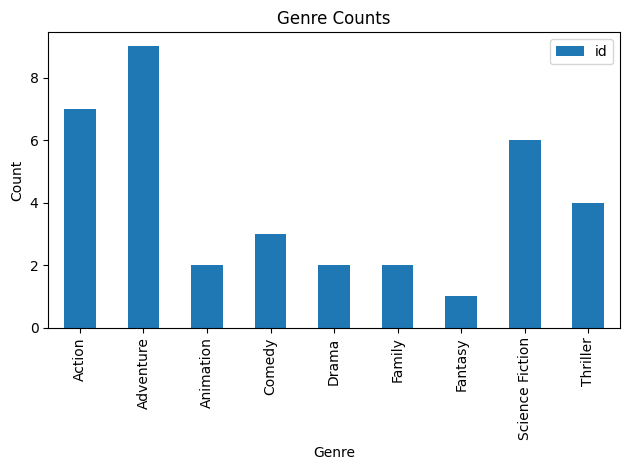

In [57]:
# Popular genres count with right join
pop_movies = pd.read_csv('pop_movies.csv')
movie_to_genres = pd.read_csv('tdmb_movie_to_genres.csv')

genres_movies = movie_to_genres.merge(pop_movies, how='right', 
                                      left_on='movie_id', right_on='id')
genre_count = genres_movies.groupby('genre').agg({'id': 'count'})
print("Genre counts:")
print(genre_count)

genre_count.plot(kind='bar')
plt.title('Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [58]:
# Outer Join
family = movie_to_genres[movie_to_genres['genre'] == 'Family'].head(3)
comedy = movie_to_genres[movie_to_genres['genre'] == 'Comedy'].head(3)

family_comedy = family.merge(comedy, on='movie_id', how='outer', suffixes=('_fam', '_com'))
print("Family-Comedy outer join:")
print(family_comedy)

Family-Comedy outer join:
   movie_id genre_fam genre_com
0         5       NaN    Comedy
1        12    Family       NaN
2        13       NaN    Comedy
3        35    Family    Comedy
4       105    Family       NaN


In [59]:
# Self Join (sequels)
sequels = pd.read_pickle('sequels.p')

original_sequels = sequels.merge(sequels, left_on='sequel', right_on='id', 
                                 suffixes=('_org', '_seq'))
print("Original-Sequels inner self join:")
print(original_sequels.head())

original_sequels_left = sequels.merge(sequels, left_on='sequel', right_on='id', 
                                      how='left', suffixes=('_org', '_seq'))
print("\nOriginal-Sequels left self join:")
print(original_sequels_left.head())

Original-Sequels inner self join:
   id_org                                          title_org  sequel_org  \
0     862                                          Toy Story         863   
1     863                                        Toy Story 2       10193   
2     675          Harry Potter and the Order of the Phoenix         767   
3     121              The Lord of the Rings: The Two Towers         122   
4     120  The Lord of the Rings: The Fellowship of the Ring         121   

   id_seq                                      title_seq  sequel_seq  
0     863                                    Toy Story 2       10193  
1   10193                                    Toy Story 3        <NA>  
2     767         Harry Potter and the Half-Blood Prince        <NA>  
3     122  The Lord of the Rings: The Return of the King        <NA>  
4     121          The Lord of the Rings: The Two Towers         122  

Original-Sequels left self join:
   id_org     title_org  sequel_org  id_seq    ti

In [60]:
# Self join (crews director)
crews = pd.read_pickle('crews.p')

crews_self_merged = crews.merge(crews, on='id', suffixes=('_dir', '_crew'))

boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
                  (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

print("Directors who also did other crew work:")
print(direct_crews.head())

Directors who also did other crew work:
        id department_dir   job_dir       name_dir department_crew  \
156  19995      Directing  Director  James Cameron         Editing   
157  19995      Directing  Director  James Cameron           Sound   
158  19995      Directing  Director  James Cameron      Production   
160  19995      Directing  Director  James Cameron         Writing   
161  19995      Directing  Director  James Cameron             Art   

           job_crew          name_crew  
156          Editor  Stephen E. Rivkin  
157  Sound Designer  Christopher Boyes  
158         Casting          Mali Finn  
160          Writer      James Cameron  
161    Set Designer    Richard F. Mays  


In [61]:
# Metallica tracks concat variations
tracks_master = pd.read_csv('tracks_master.csv')
tracks_ride = pd.read_csv('tracks_ride.csv')
tracks_st = pd.read_csv('tracks_st.csv')

tracks_sorted = pd.concat([tracks_master, tracks_ride, tracks_st], sort=True)
print("Tracks concatenated with sort=True:")
print(tracks_sorted.head())

tracks_ignore = pd.concat([tracks_master, tracks_ride, tracks_st], ignore_index=True)
print("\nTracks concatenated with ignore_index=True:")
print(tracks_ignore.head())

tracks_inner = pd.concat([tracks_master, tracks_ride, tracks_st], join='inner')
print("\nTracks concatenated with join='inner':")
print(tracks_inner.head())

Tracks concatenated with sort=True:
   aid             composer  gid  mtid                  name   tid  u_price
0  152  J.Hetfield/L.Ulrich    3     1               Battery  1853     0.99
1  152            K.Hammett    3     1     Master Of Puppets  1854     0.99
2  152  J.Hetfield/L.Ulrich    3     1     Disposable Heroes  1857     0.99
0  154                  NaN    3     1  Fight Fire With Fire  1874     0.99
1  154                  NaN    3     1    Ride The Lightning  1875     0.99

Tracks concatenated with ignore_index=True:
    tid                  name  aid  mtid  gid             composer  u_price
0  1853               Battery  152     1    3  J.Hetfield/L.Ulrich     0.99
1  1854     Master Of Puppets  152     1    3            K.Hammett     0.99
2  1857     Disposable Heroes  152     1    3  J.Hetfield/L.Ulrich     0.99
3  1874  Fight Fire With Fire  154     1    3                  NaN     0.99
4  1875    Ride The Lightning  154     1    3                  NaN     0.99

Tracks

Monthly average:
         total
7Jul  5.431429
8Aug  5.660000
9Sep  5.945455


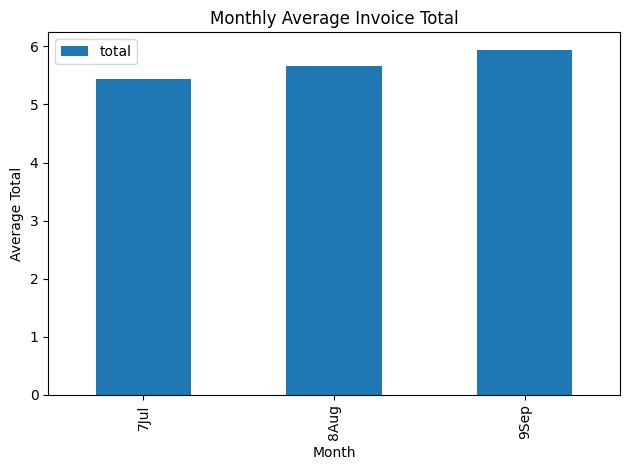

In [62]:
# Invoice monthly average with keys
inv_jul = pd.read_csv('inv_jul.csv')
inv_aug = pd.read_csv('inv_aug.csv')
inv_sep = pd.read_csv('inv_sep.csv')

avg_inv_by_month = pd.concat([inv_jul, inv_aug, inv_sep], 
                             keys=['7Jul', '8Aug', '9Sep'])

monthly_avg = avg_inv_by_month.groupby(level=0).agg({'total': 'mean'})
print("Monthly average:")
print(monthly_avg)

monthly_avg.plot(kind='bar')
plt.title('Monthly Average Invoice Total')
plt.xlabel('Month')
plt.ylabel('Average Total')
plt.tight_layout()
plt.show()

In [63]:
# GDP and S&P500 correlation
gdp = pd.read_csv('GDP.csv')
sp500 = pd.read_csv('S&P500.csv')

gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', how='left')
print("GDP-S&P500 merge for 2018:")
print(gdp_sp500[gdp_sp500['year'] == 2018])

gdp_sp500_ffill = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                                   how='left', fill_method='ffill')

gdp_returns = gdp_sp500_ffill[['gdp', 'returns']]
print("\nGDP-Returns correlation:")
print(gdp_returns.corr())

GDP-S&P500 merge for 2018:
   Unnamed: 0 country code  year           gdp  date  returns
9          39          USA  2018  2.050000e+13   NaN      NaN

GDP-Returns correlation:
              gdp   returns
gdp      1.000000  0.220321
returns  0.220321  1.000000


Inflation-Unemployment merged:
       date      cpi     seriesid                  data_type  \
0  1/1/2014  235.288  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
1  1/1/2015  234.718  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
2  1/1/2016  237.833  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
3  1/1/2017  243.780  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
4  1/1/2018  248.884  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   

   unemployment_rate  
0                6.7  
1                5.6  
2                5.0  
3                4.7  
4                4.1  


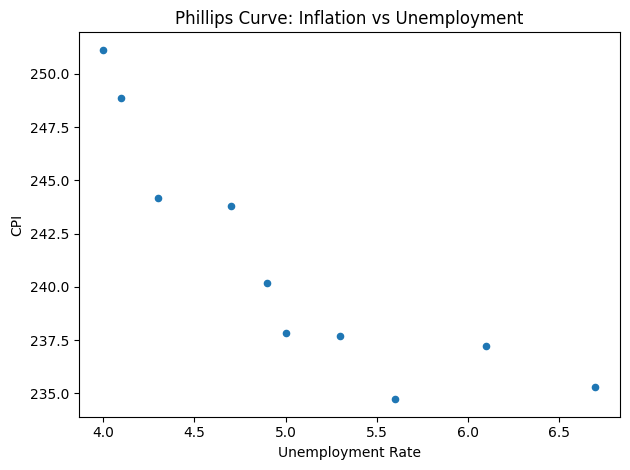


CPI-Unemployment correlation:
                        cpi  unemployment_rate
cpi                1.000000          -0.868388
unemployment_rate -0.868388           1.000000


In [64]:
# Phillips curve (inflation vs unemployment)
inflation = pd.read_csv('inflation.csv')
unemployment = pd.read_csv('unemployment.csv')

inflation_unemploy = pd.merge_ordered(inflation, unemployment, on='date', how='inner')
print("Inflation-Unemployment merged:")
print(inflation_unemploy.head())

inflation_unemploy.plot(kind='scatter', x='unemployment_rate', y='cpi')
plt.title('Phillips Curve: Inflation vs Unemployment')
plt.xlabel('Unemployment Rate')
plt.ylabel('CPI')
plt.tight_layout()
plt.show()

print("\nCPI-Unemployment correlation:")
print(inflation_unemploy[['cpi', 'unemployment_rate']].corr())